Overview: The health department in NYC conducts inspection of restaurants every year. During which the restaurants' compliance of health code will be assessed. the inspection results are summarized in the following dataset, including the name and location of the restaurant being inspected,  CAMIS(the unique indentification code of the restaurant), date of inspection, violation of health code found and score for a particular inspection(more violation will result in higher score). Note that the dataset only record active restaurant in NYC and was last updated on July28 2021

Data Source: NYC OPEN DATA (see https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j)

In [31]:
#import pandas and dataset
import pandas as pd
rest = pd.DataFrame(pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv'))

In [32]:
#overview
rest.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
dtype: object

In [33]:
rest

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41711597,THE SICILIAN,Brooklyn,229,PROSPECT PARK WEST,11215.0,7187881050,Pizza,07/22/2021,Violations were cited in the following area(s).,...,07/28/2021,Cycle Inspection / Initial Inspection,40.659969,-73.980710,307.0,39.0,16900.0,3026936.0,3.011100e+09,BK40
1,50007098,MANAA SOULFOOD RESTAURANT,Brooklyn,478,ROCKAWAY AVENUE,11212.0,7189222744,Soul Food,08/14/2017,Establishment Closed by DOHMH. Violations were...,...,07/28/2021,Cycle Inspection / Re-inspection,40.668184,-73.910368,316.0,41.0,92400.0,3393299.0,3.035210e+09,BK81
2,50082345,COMPTON'S,Queens,3002,14TH ST,11102.0,9174750573,Sandwiches/Salads/Mixed Buffet,11/04/2019,Violations were cited in the following area(s).,...,07/28/2021,Cycle Inspection / Initial Inspection,40.770703,-73.930040,401.0,22.0,7900.0,4005658.0,4.005150e+09,QN71
3,41652054,MEI CHUNG MEI RESTAURANT,Bronx,157,WEST 231 STREET,10463.0,7185496719,Chinese,05/25/2017,Violations were cited in the following area(s).,...,07/28/2021,Cycle Inspection / Initial Inspection,40.878259,-73.903036,208.0,14.0,27700.0,2016144.0,2.032670e+09,BX28
4,50088424,M&R FIRE FEST,Queens,13123,LIBERTY AVE,11419.0,7183222488,Caribbean,03/12/2019,Violations were cited in the following area(s).,...,07/28/2021,Pre-permit (Operational) / Initial Inspection,40.690203,-73.814594,410.0,28.0,15801.0,4204043.0,4.095680e+09,QN55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411724,50065875,COLD STONE CREAMERY,Brooklyn,3165,HARKNESS AVENUE,11235.0,7188911114,Frozen Desserts,08/28/2017,Violations were cited in the following area(s).,...,07/28/2021,Pre-permit (Operational) / Initial Inspection,40.586540,-73.929387,315.0,48.0,62800.0,3248659.0,3.088410e+09,BK17
411725,50036711,MALLY'S,Brooklyn,199,KNICKERBOCKER AVENUE,11237.0,3474069964,Mexican,02/21/2019,Violations were cited in the following area(s).,...,07/28/2021,Cycle Inspection / Initial Inspection,40.703520,-73.926630,304.0,34.0,42700.0,3072343.0,3.031750e+09,BK77
411726,41124419,BURGER HUT,Bronx,152112,WESTCHESTER AVENUE,NaN,7188426426,American,05/23/2019,Violations were cited in the following area(s).,...,07/28/2021,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,2.000000e+00,NaN
411727,50078655,HANSHI BAOZI,Queens,4002,BOWNE ST,11354.0,9176871789,Chinese,12/26/2019,Violations were cited in the following area(s).,...,07/28/2021,Cycle Inspection / Initial Inspection,40.760778,-73.824342,407.0,20.0,85500.0,4113632.0,4.050210e+09,QN22


In [34]:
#convert inspection date to a datetime object
rest['INSPECTION DATE'] = pd.to_datetime(rest['INSPECTION DATE'])


In [35]:
#the dataset contains some duplicated rows (likely due to the fact that it is compiled from several large administrative data systems)
rest.duplicated().sum()

24616

In [36]:
#Establishments with inspection date of 1/1/1900 are new establishments that have not yet received an inspection.
#These establishment will be removed as they are not essential to this analysis
rest.groupby('INSPECTION DATE').size().sort_index()

INSPECTION DATE
1900-01-01    4919
2009-06-22       1
2011-04-19       7
2011-05-27       3
2011-10-13       7
              ... 
2021-07-21     444
2021-07-22     561
2021-07-23     353
2021-07-24      26
2021-07-26     245
Length: 1455, dtype: int64

In [37]:
#remove duplicated rows and new restaurants
rest = rest.drop_duplicates().reset_index(drop = True)[['CAMIS','DBA','BORO','CUISINE DESCRIPTION','VIOLATION CODE','VIOLATION DESCRIPTION','CRITICAL FLAG','SCORE','INSPECTION DATE','INSPECTION TYPE','ACTION']]
rest = rest[rest['INSPECTION DATE']!='01/01/1900']

In [38]:
#Some establishments have had numerous inspections over the past few years or had multiple violation detected during one inspection
rest.sort_values(by=['CAMIS','INSPECTION DATE']).head(10)

,CAMIS,DBA,BORO,CUISINE DESCRIPTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,INSPECTION DATE,INSPECTION TYPE,ACTION
103029,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,06D,"Food contact surface not properly washed, rins...",Critical,7.0,2017-05-18,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
150396,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,2017-05-18,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
118899,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,2018-05-11,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
222632,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,2018-05-11,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
2487,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,04L,Evidence of mice or live mice present in facil...,Critical,14.0,2019-05-16,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
27652,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,2019-05-16,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
47997,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,10F,Non-food contact surface improperly constructe...,Not Critical,14.0,2019-05-16,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
237334,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,10B,Plumbing not properly installed or maintained;...,Not Critical,6.0,2019-06-11,Cycle Inspection / Re-inspection,Violations were cited in the following area(s).
296398,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,08C,Pesticide use not in accordance with label or ...,Not Critical,6.0,2019-06-11,Cycle Inspection / Re-inspection,Violations were cited in the following area(s).
355657,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,10F,Non-food contact surface improperly constructe...,Not Critical,6.0,2019-06-11,Cycle Inspection / Re-inspection,Violations were cited in the following area(s).


In [39]:
#create a dataframe that only contains the most recent inspection of each restaurant
for code in rest['CAMIS'].unique():
    rest.loc[rest.CAMIS == code,'RECENT'] = max(rest[rest['CAMIS']==code]['INSPECTION DATE'])
rest = rest[rest['INSPECTION DATE']==rest['RECENT']]    
    

In [40]:
#use the score of the most recent inspection to reflect the current safeness of a restaurant
#drop rows where boro is missing i.e.'0'
rest = rest.groupby(['BORO','CAMIS']).mean().drop('0',axis=0)

In [41]:
rest.groupby('BORO').describe()

SCORE                                                  
                count       mean       std  min  25%   50%   75%    max
BORO                                                                   
Bronx          2249.0  11.586928  8.094616  0.0  8.0  11.0  13.0  164.0
Brooklyn       6263.0  11.749321  8.245983  0.0  8.0  11.0  13.0   99.0
Manhattan      9948.0  11.568858  8.425725  0.0  7.0  10.0  13.0  133.0
Queens         5699.0  11.907703  8.612759  0.0  8.0  11.0  13.0  121.0
Staten Island   928.0  11.908405  7.646534  0.0  8.0  11.0  13.0   67.0

According to the health department, there are approximately 27000 restaurant in NYC. The dataset above has 25087 entries and 900+ representatives from each boroughs, making it a good reflection of the industry.

<AxesSubplot:xlabel='BORO'>

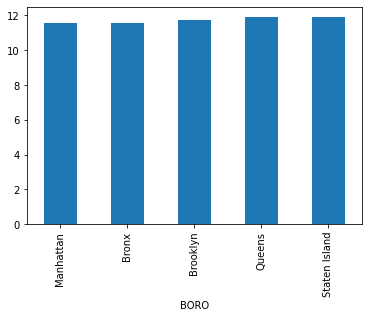

In [42]:
#plot average score of each borough on a bar chart
rest.groupby('BORO').mean().sort_values('SCORE')['SCORE'].plot(kind='bar')


The averages are very close, however, the average score is subject to the impact of extreme 
values. Before the final conclusion can be made, one should also inspect the data with the extreme values eliminated.

In [43]:
#compute percentage of grade'A' restaurant in each borough
rest[rest['SCORE']<14].groupby('BORO').size()/rest.groupby('BORO').size()

BORO
Bronx            0.831431
Brooklyn         0.839475
Manhattan        0.843077
Queens           0.832986
Staten Island    0.830290
dtype: float64

According to NYC health department, restaurant with score lower than 14 is graded 'A'. By comparing the percentage of grade 'A'
restaurants in each borough, one can conclude that there is no significant discrepancy between boroughs in terms of food safety.